In [18]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing

In [19]:
(train_x,train_y), (test_x,test_y)=boston_housing.load_data()

In [20]:
df = boston_housing.load_data()
df

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [21]:
print("train shape: ",train_x.shape)
print("test shape: ",test_x.shape)
print("actual train output:",train_y.shape)
print("actual test output:",test_y.shape)

train shape:  (404, 13)
test shape:  (102, 13)
actual train output: (404,)
actual test output: (102,)


In [22]:
#normalization for preprocessing
train_x=preprocessing.normalize(train_x)
test_x=preprocessing.normalize(test_x)

In [27]:
from tensorflow.python import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
def HousePricePredictionModel():  
	model=Sequential()
	model.add(Dense(128,activation='relu',input_shape=(train_x[0].shape)))
	model.add(Dense(64,activation='relu'))
	model.add(Dense(32,activation='relu'))
	model.add(Dense(1))
	model.compile(optimizer='adam',loss='mse',metrics=['mae'])
	return model

In [28]:
import numpy as np
k=4
num_val_samples=len(train_x)
num_epochs=25
all_scores=[]

In [29]:
model= HousePricePredictionModel()
history=model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=1, verbose=1, validation_data=(test_x,test_y))

Epoch 1/25
404/404 [==============================] - 2s 3ms/step - loss: 109.8739 - mae: 7.5118 - val_loss: 68.1363 - val_mae: 5.8303
Epoch 2/25
404/404 [==============================] - 1s 2ms/step - loss: 61.4945 - mae: 5.5198 - val_loss: 54.2763 - val_mae: 5.4431
Epoch 3/25
404/404 [==============================] - 1s 2ms/step - loss: 60.1013 - mae: 5.4413 - val_loss: 64.6599 - val_mae: 5.6244
Epoch 4/25
404/404 [==============================] - 1s 2ms/step - loss: 56.2954 - mae: 5.1008 - val_loss: 61.6269 - val_mae: 5.5152
Epoch 5/25
404/404 [==============================] - 1s 2ms/step - loss: 53.9737 - mae: 4.9658 - val_loss: 57.1705 - val_mae: 5.2890
Epoch 6/25
404/404 [==============================] - 1s 2ms/step - loss: 49.9884 - mae: 4.8817 - val_loss: 50.4822 - val_mae: 4.9501
Epoch 7/25
404/404 [==============================] - 1s 2ms/step - loss: 48.0726 - mae: 4.7661 - val_loss: 45.0986 - val_mae: 4.6662
Epoch 8/25
404/404 [==============================] - 1s 2ms/

In [30]:
mse, mae = model.evaluate(test_x, test_y)
print('Mean squared error on test data: ', mse)
print('Mean absolute error on test data: ', mae)

4/4 [==============================] - 0s 2ms/step - loss: 42.7443 - mae: 4.6663
Mean squared error on test data:  42.74434280395508
Mean absolute error on test data:  4.666339874267578


In [31]:
pred_y = model.predict(test_x)
pred_y

4/4 [==============================] - 0s 2ms/step


array([[10.455874 ],
       [16.800373 ],
       [21.445223 ],
       [28.67097  ],
       [22.014063 ],
       [17.591082 ],
       [23.737913 ],
       [21.676332 ],
       [18.242334 ],
       [16.50138  ],
       [13.895844 ],
       [18.230785 ],
       [15.645368 ],
       [31.384016 ],
       [14.474858 ],
       [19.264574 ],
       [20.5606   ],
       [18.139318 ],
       [15.811094 ],
       [19.623568 ],
       [12.028991 ],
       [12.396495 ],
       [19.609085 ],
       [16.375402 ],
       [20.328756 ],
       [18.361042 ],
       [21.72699  ],
       [28.369862 ],
       [11.432055 ],
       [19.702337 ],
       [18.27608  ],
       [12.257459 ],
       [27.36434  ],
       [19.833284 ],
       [14.838738 ],
       [11.584262 ],
       [14.349315 ],
       [14.05899  ],
       [16.199753 ],
       [24.104033 ],
       [22.61692  ],
       [21.89771  ],
       [14.679554 ],
       [25.572989 ],
       [32.526558 ],
       [21.586401 ],
       [24.450827 ],
       [17.92

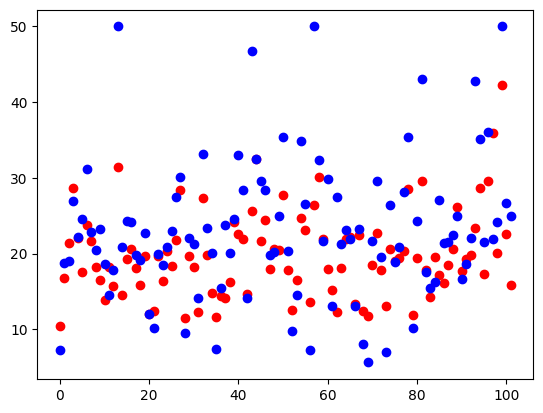

In [40]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0, pred_y.size), pred_y,color="red")
plt.scatter(np.arange(0, test_y.size), test_y,color="blue")